# **Import Libraries**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Basic/Support Vector Machine (SVM)/Data/voice.csv')

# **Exploratory Data Analysis (EDA)**

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [15]:
print('Total number of labels : {}'.format(df.shape[0]))
print('Number of male : {}'.format(df[df.label == 'male'].shape[0]))
print('Number of female : {}'.format(df[df.label == 'female'].shape[0]))

Total number of labels : 3168
Number of male : 1584
Number of female : 1584


## **Heat Map**

In [12]:
df_numeric = df.drop('label', axis=1)

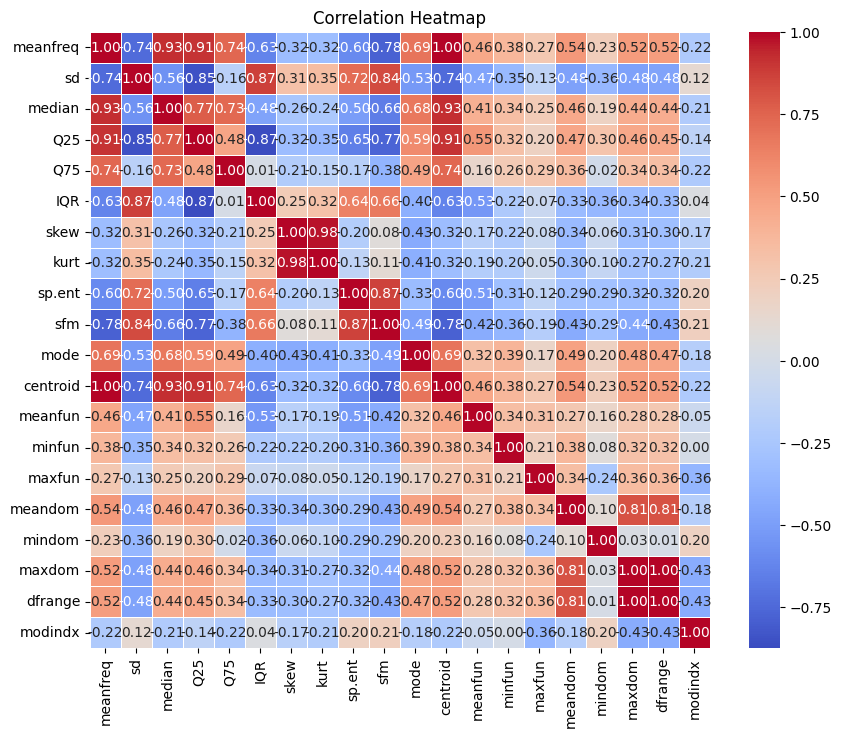

In [13]:
correlation = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Define Dependent & Independent Features**

In [16]:
X = df.drop('label', axis=1)
y = df['label']

# **Convert the Labels into Integers Type**

In [24]:
y.head()

,label
0,male
1,male
2,male
3,male
4,male


**Note**

The data type of label column is object.

We change it into integers :

1 for Male

0 for Female

In [25]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [27]:
y

array([1, 1, 1, ..., 0, 0, 0])

# **Data Splitting**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2534, 20), (634, 20), (2534,), (634,))

# **Modelling**

In [30]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

# **Predict**

In [31]:
y_pred = svc.predict(X_test)

In [38]:
print('Accuracy Score :')
print(metrics.accuracy_score(y_test, y_pred))

Accuracy Score :
0.6829652996845426


# **Tuning Model with Various Kernels**

## **Linear Kernel**

In [35]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
y_pred_linear = svc_linear.predict(X_test)

In [37]:
print('Accuracy Score :')
print(metrics.accuracy_score(y_test, y_pred_linear))

Accuracy Score :
0.9148264984227129


## **RBF Kernel**

In [39]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

SVC()

In [40]:
y_pred_rbf = svc_rbf.predict(X_test)

In [41]:
print('Accuracy Score :')
print(metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy Score :
0.6829652996845426


## **Polynomial Kernel**

In [42]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [43]:
y_pred_poly = svc_poly.predict(X_test)

In [44]:
print('Accuracy Score :')
print(metrics.accuracy_score(y_test, y_pred_poly))

Accuracy Score :
0.5031545741324921


**Note**

The best Kernels is Linear which has Accuracy Score 91%.

Confusion Matrix (Linear Kernel):
 [[265  46]
 [  8 315]]


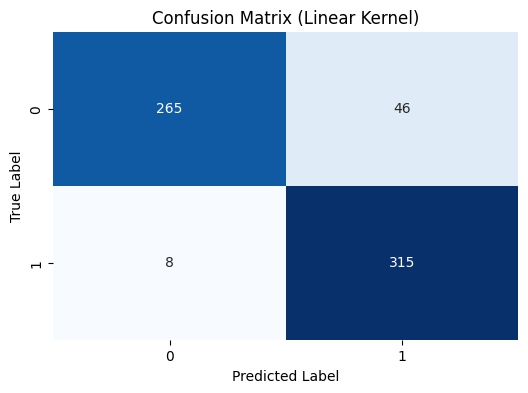

In [46]:
cm_svc_linear = confusion_matrix(y_test, y_pred_linear)
print('Confusion Matrix (Linear Kernel):\n', cm_svc_linear)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc_linear, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Linear Kernel)')
plt.show()

In [47]:
print('\nClassification Report (Linear Kernel):\n', classification_report(y_test, y_pred_linear))


Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       311
           1       0.87      0.98      0.92       323

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634

